changed to markdown so that this code isn't run
from qsurface.main import initialize, run
%matplotlib tk

code, decoder = initialize((6,6), "planar", "mwpm", enabled_errors=["pauli"], faulty_measurements=True, plotting=True, initial_states=(0,0))
run(code, decoder, iteration=10, error_rates = {"p_bitflip": 0.05, "p_bitflip_plaq": 0.05}, decode_initial=False)

changed to markdown
from qsurface.main import initialize, run
code, decoder = initialize((6,6), "toric", "mwpm", enabled_errors=["pauli"])
run(code, decoder, iterations=10, error_rates = {"p_bitflip": 0.1})

Notes for self:


In [1]:
from qsurface.errors.pauli import Sim as PauliSim
from qsurface.codes.elements import DataQubit
from qsurface.codes.elements import AncillaQubit
from qsurface.codes.elements import Edge
from qsurface.main import initialize

In [2]:
error = PauliSim(p_bitflip = 0.05)

In [3]:
dqubit = DataQubit((0,0))

In [4]:
ancilla_a = AncillaQubit((0,0.5), state_type = "x")
ancilla_b = AncillaQubit((-0.5,0), state_type = "z")
ancilla_c = AncillaQubit((0.5,0), state_type = "z")
ancilla_d = AncillaQubit((0,-0.5), state_type = "x")

In [5]:
# see entangle_pair under qsurface.codes._template

ancilla_a.parity_qubits[(0,0)] = dqubit
ancilla_b.parity_qubits[(0,0)] = dqubit
ancilla_c.parity_qubits[(0,0)] = dqubit
ancilla_d.parity_qubits[(0,0)] = dqubit

x_edge = Edge(dqubit, state_type="x", initial_state=False)
z_edge = Edge(dqubit, state_type="z", initial_state=False)

dqubit.edges["x"] = x_edge
dqubit.edges["z"] = z_edge

x_edge.add_node(ancilla_a)
x_edge.add_node(ancilla_d)
z_edge.add_node(ancilla_b)
z_edge.add_node(ancilla_c)

In [6]:
dqubit.state

{'x': False, 'z': False}

In [7]:
error.random_error(dqubit, p_bitflip=0, p_phaseflip=1)

In [8]:
dqubit.state

{'x': False, 'z': True}

In [9]:
ancilla_a.measure()
ancilla_b.measure()
ancilla_c.measure()
ancilla_d.measure()

False

In [10]:
ancilla_a.syndrome

False

In [11]:
ancilla_d.syndrome

False

In [12]:
ancilla_b.syndrome

True

In [13]:
ancilla_c.syndrome

True

Drawing 1/1: Initial


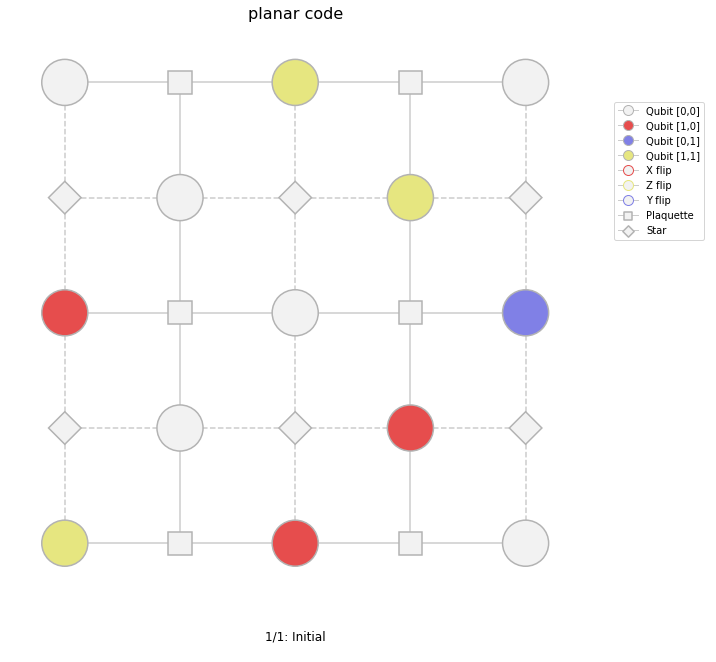

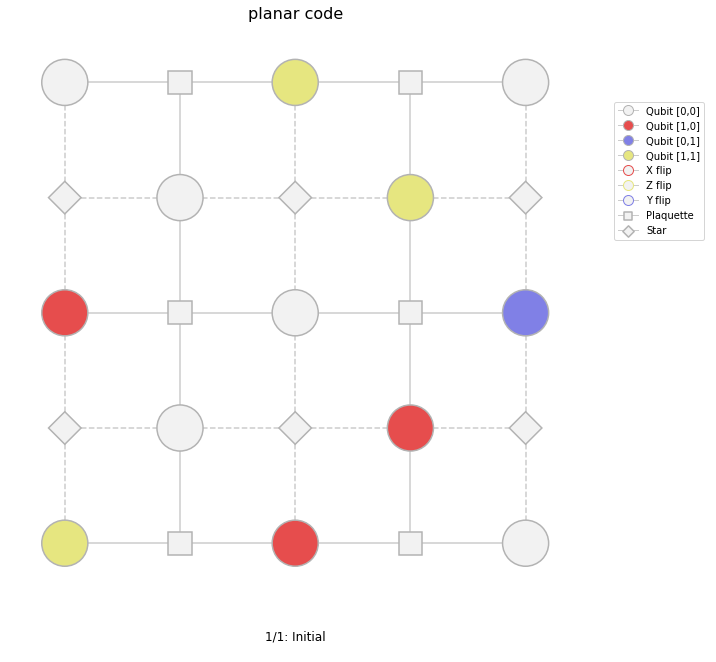

In [2]:
code, decoder = initialize((3,3), "planar", "mwpm", enabled_errors=["pauli"], plotting=True)

In [63]:
code.logical_state

{'x': 1, 'z': 1}

In [11]:
# with some adjustments, this could be changed to applying random errors
def apply_surface_error(code, errors, z=0):
    # errors is a dictionary with the qubit position as key and error type as value
    # currently supported errors are Pauli (I, X, Y, or Z)
    for qubit_pos in errors.keys():
        if errors[qubit_pos] == 'X':
            code.errors['pauli'].bitflip(code.data_qubits[z][qubit_pos])
        elif errors[qubit_pos] == 'Z':
            code.errors['pauli'].phaseflip(code.data_qubits[z][qubit_pos])
        elif errors[qubit_pos] == 'Y':
            code.errors['pauli'].bitphaseflip(code.data_qubits[z][qubit_pos])
    return code.logical_state

In [21]:
error_dict = {(0.5, 1): 'X'} # logical operators are only bottom and left ones

In [28]:
apply_surface_error(code, error_dict)

{'x': 0, 'z': 1}

In [34]:
code.ancilla_qubits[0][(1, 1)].syndrome

False

Drawing 4/4: Test 2


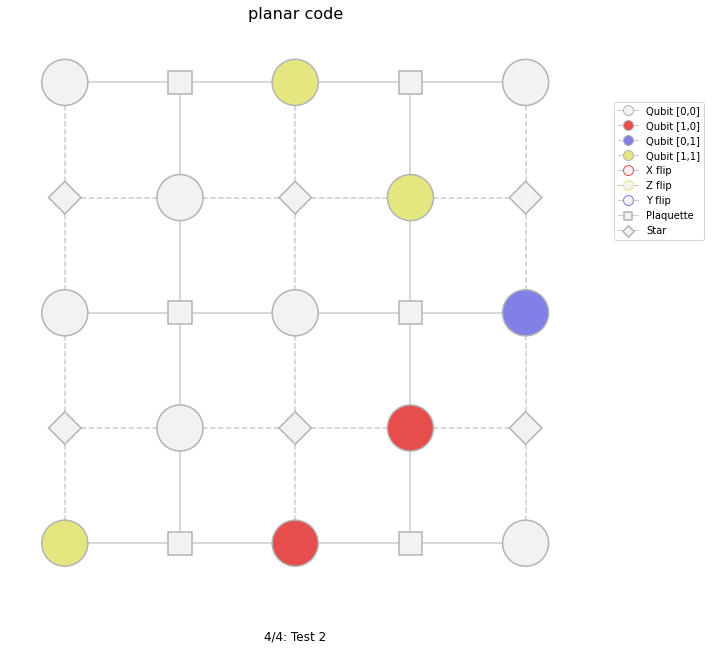

In [30]:
code.figure.draw_figure(new_iter_name="Test 2")

- get all syndromes (separate X and Z)
- Tanner graph (slides reference)
- initialize to desired state (random errors?)

In [38]:
def get_syndromes(code, z=0):
    # x ancilla are on whole number coordinates (n, m)
    # z ancilla are on half integer coordinates (n.5, m.5)
    coordinates = sorted(code.ancilla_qubits[z].keys())
    x_ancilla=[]
    z_ancilla=[]
    
    for coord in coordinates:
        if coord[1] % 1: # False if whole integer, True if half integer
            z_ancilla.append(code.ancilla_qubits[z][coord])
        else:
            x_ancilla.append(code.ancilla_qubits[z][coord])
    
    x_str = ""
    z_str = ""
    
    for x in x_ancilla:
        if x.syndrome:
            x_str += "1"
        else:
            x_str += "0"
    for z in z_ancilla:
        if z.syndrome:
            z_str += "1"
        else:
            z_str += "0"
    return x_str, z_str

In [22]:
def tanner(code):
    x_syn, z_syn = get_syndromes(code, z=0)
    return

In [39]:
get_syndromes(code)

('000000', '000000')